In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fitriadesiyani","key":"a8814f94c857e7fe65aab02dcc52f5e9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d andrewmvd/fetal-health-classification

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification
License(s): other
  0% 0.00/45.8k [00:00<?, ?B/s]
100% 45.8k/45.8k [00:00<00:00, 61.3MB/s]


In [4]:
!unzip fetal-health-classification.zip -d fetal-health-classification
!ls fetal-health-classification

Archive:  fetal-health-classification.zip
  inflating: fetal-health-classification/fetal_health.csv  
fetal_health.csv


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Concatenate

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
df = pd.read_csv("/content/fetal-health-classification/fetal_health.csv")

In [8]:
df.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [10]:
df.drop(columns=['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_number_of_peaks','histogram_number_of_zeroes'], inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   histogram_width     2126 non-null   float64
 1   histogram_min       2126 non-null   float64
 2   histogram_max       2126 non-null   float64
 3   histogram_mode      2126 non-null   float64
 4   histogram_mean      2126 non-null   float64
 5   histogram_median    2126 non-null   float64
 6   histogram_variance  2126 non-null   float64
 7   histogram_tendency  2126 non-null   float64
 8   fetal_health        2126 non-null   float64
dtypes: float64(9)
memory usage: 149.6 KB


In [13]:
X = df.drop("fetal_health",axis=1)
y = pd.get_dummies(df.fetal_health)

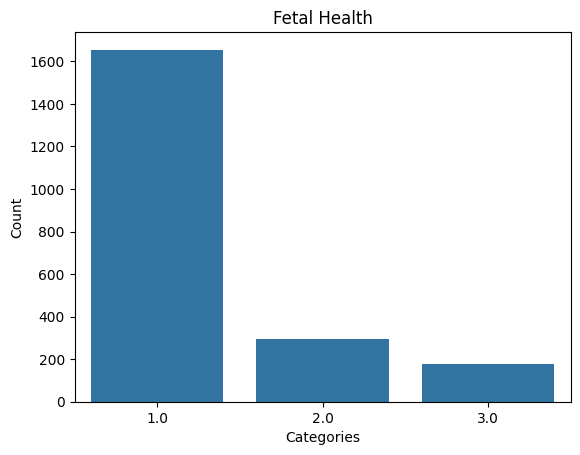

In [17]:
import seaborn as sns
sns.countplot(data=df, x='fetal_health')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Fetal Health')
plt.show()

In [18]:
X

histogram_width  histogram_min  histogram_max  histogram_mode  \
0                64.0           62.0          126.0           120.0   
1               130.0           68.0          198.0           141.0   
2               130.0           68.0          198.0           141.0   
3               117.0           53.0          170.0           137.0   
4               117.0           53.0          170.0           137.0   
...               ...            ...            ...             ...   
2121             40.0          137.0          177.0           153.0   
2122             66.0          103.0          169.0           152.0   
2123             67.0          103.0          170.0           153.0   
2124             66.0          103.0          169.0           152.0   
2125             42.0          117.0          159.0           145.0   

      histogram_mean  histogram_median  histogram_variance  histogram_tendency  
0              137.0             121.0                73.0                 1.0  
1              136.0             140.0                12.0                 0.0  
2              135.0             138.0                13.0                 0.0  
3              134.0             137.0                13.0                 1.0  
4              136.0             138.0                11.0                 1.0  
...              ...               ...                 ...                 ...  
2121           150.0             152.0                 2.0                 0.0  
2122           148.0             151.0                 3.0                 1.0  
2123           148.0             152.0                 4.0                 1.0  
2124           147.0             151.0                 4.0                 1.0  
2125           143.0             145.0                 1.0                 0.0  

[2126 rows x 8 columns]

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(2126, 8)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, shuffle=True, random_state=42)

In [21]:
X_train.shape

(1913, 8)

In [22]:
model = Sequential()

model.add(Dense(8, activation='relu', input_shape= X_train.shape[1:]))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [23]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 3)                 51        
                                                                 
Total params: 267 (1.04 KB)
Trainable params: 267 (1.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(loss="categorical_crossentropy",metrics="accuracy",optimizer="rmsprop")
early_stop = keras.callbacks.EarlyStopping(patience=20)
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,callbacks=early_stop)

Epoch 1/15
60/60 [==============================] - 1s 6ms/step - loss: 2.5359 - accuracy: 0.7229 - val_loss: 1.5215 - val_accuracy: 0.6808
Epoch 2/15
60/60 [==============================] - 0s 2ms/step - loss: 1.0802 - accuracy: 0.7397 - val_loss: 1.1645 - val_accuracy: 0.7277
Epoch 3/15
60/60 [==============================] - 0s 2ms/step - loss: 0.9462 - accuracy: 0.7522 - val_loss: 1.0959 - val_accuracy: 0.6854
Epoch 4/15
60/60 [==============================] - 0s 2ms/step - loss: 0.8703 - accuracy: 0.7527 - val_loss: 0.9333 - val_accuracy: 0.7136
Epoch 5/15
60/60 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.7543 - val_loss: 0.9450 - val_accuracy: 0.6526
Epoch 6/15
60/60 [==============================] - 0s 2ms/step - loss: 0.7769 - accuracy: 0.7689 - val_loss: 0.9203 - val_accuracy: 0.6854
Epoch 7/15
60/60 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.7804 - val_loss: 0.7560 - val_accuracy: 0.7700
Epoch 8/15
60/60 [==

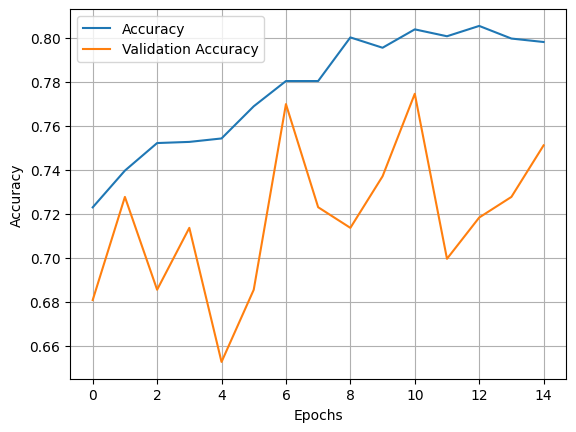

In [26]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.accuracy,label="Accuracy")
plt.plot(history_df.val_accuracy,label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

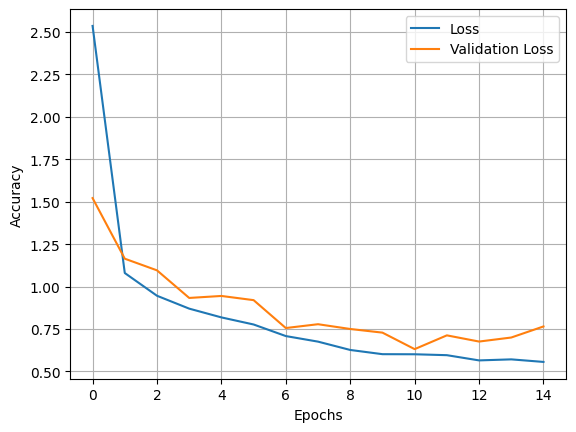

In [27]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loss,label="Loss")
plt.plot(history_df.val_loss,label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()

In [28]:
y_pred =model.predict(X_test)
y_pred = (y_pred>0.5)

7/7 [==============================] - 0s 3ms/step


In [29]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7183098591549296


In [30]:
model.save('./fetalhealth.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
model = tf.keras.models.load_model('./fetalhealth.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./fetalhealth.tflite", "wb").write(tflite_model)

3164